In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
compras_df=pd.read_csv('data/clean_compras.csv')

In [6]:
compras_df.head()

,CVE BEN,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,116117,"URBANIZACIONES AGV, S.A. DE C.V.",UAG010828F33,2157-185004-6,SIS-005-2022,RP 30% ANT. SIS-RP-02/21-CP ADEC. EN INTERS.VI...,TR,1021658.0,2022-01-28,2213909.61,CONTRATISTAS
1,123046,"CONSTRU-SHENSA, SA. DE CV.",CSH860224497,556-185004-9,SIS-002-2022,RP 30% ANT. SIS-RP-06/21-CP CONSTRUCCIÓN DE D...,TR,1021659.0,2022-01-28,3561868.30,CONTRATISTAS
2,123262,"CONSTRUCCIONES DYNAMO, SA. DE CV.",CDY980323MA8,1103-185004-7,SIS-008-2022,RP 30% ANT. SIS-RP-03/21-CP ADEC. EN INTERS.VI...,TR,1021665.0,2022-01-28,2577020.31,CONTRATISTAS
3,123318,"STRUCTOR CONSTRUCCIONES, S.A. DE C.V.",SCO010914CD8,AA140-185004-11,SIS-003-2022,RP 30% ANT. SIS-RP-08/21-CP ONSTRUCCIÓN DE OFI...,TR,1021660.0,2022-01-28,2834984.00,CONTRATISTAS
4,123530,"SERVICIOS POLISEMICOS, S.A. DE C.V.",SPO011004F27,421-185004-10,SIS-010-2022,RP 30% ANT. SIS-RP-07/21-CP CONSTRUCCIÓN DE ES...,TR,1021667.0,2022-01-28,4607808.29,CONTRATISTAS


# Visión General de Dataset

In [8]:
compras_df.columns

Index(['CVE BEN', 'BENEFICIARIO', 'RFC', 'FACTURAS', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [11]:
compras_df.dtypes

CVE BEN           int64
BENEFICIARIO     object
RFC              object
FACTURAS         object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO-#OP         float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [13]:
compras_df.describe()

,CVE BEN,FDO-#OP,IMPORTE
count,1.769600e+04,1.769600e+04,1.769600e+04
mean,2.177507e+05,1.384800e+08,4.016975e+05
std,9.887818e+04,1.629893e+08,2.252700e+06
min,1.100360e+05,1.021649e+06,1.980000e+00
25%,1.165500e+05,1.023524e+06,5.139812e+03
50%,2.030160e+05,1.107746e+06,2.000000e+04
75%,3.183680e+05,3.300004e+08,1.132342e+05
max,2.148732e+06,6.040001e+08,9.772146e+07


In [17]:
compras_df=compras_df[['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'TIPO', 'FECHA', 'IMPORTE', 'SHEET','CONCEPTO']]

In [19]:
compras_df.head()

,BENEFICIARIO,FACTURAS,CONTRATO,TIPO,FECHA,IMPORTE,SHEET,CONCEPTO
0,"URBANIZACIONES AGV, S.A. DE C.V.",2157-185004-6,SIS-005-2022,TR,2022-01-28,2213909.61,CONTRATISTAS,RP 30% ANT. SIS-RP-02/21-CP ADEC. EN INTERS.VI...
1,"CONSTRU-SHENSA, SA. DE CV.",556-185004-9,SIS-002-2022,TR,2022-01-28,3561868.30,CONTRATISTAS,RP 30% ANT. SIS-RP-06/21-CP CONSTRUCCIÓN DE D...
2,"CONSTRUCCIONES DYNAMO, SA. DE CV.",1103-185004-7,SIS-008-2022,TR,2022-01-28,2577020.31,CONTRATISTAS,RP 30% ANT. SIS-RP-03/21-CP ADEC. EN INTERS.VI...
3,"STRUCTOR CONSTRUCCIONES, S.A. DE C.V.",AA140-185004-11,SIS-003-2022,TR,2022-01-28,2834984.00,CONTRATISTAS,RP 30% ANT. SIS-RP-08/21-CP ONSTRUCCIÓN DE OFI...
4,"SERVICIOS POLISEMICOS, S.A. DE C.V.",421-185004-10,SIS-010-2022,TR,2022-01-28,4607808.29,CONTRATISTAS,RP 30% ANT. SIS-RP-07/21-CP CONSTRUCCIÓN DE ES...


# Análisis unidimensional

In [22]:
compras_df['SHEET'].value_counts()

SHEET
GASTOS VARIOS     6960
CONTRATISTAS      6843
PERSONALES        2364
COMUNICACION      1088
SERVICIOS          340
REPRESENTACION      91
VIAJE               10
Name: count, dtype: int64

In [24]:
compras_df['SHEET'].unique()

array(['CONTRATISTAS', 'GASTOS VARIOS', 'REPRESENTACION', 'PERSONALES',
       'SERVICIOS', 'COMUNICACION', 'VIAJE'], dtype=object)

In [26]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    1522
INTERASFALTOS, S.A. DE C.V.                            537
CAR ONE MONTERREY, S.A. DE C.V.                        380
GARCIA ZAVALA EDGAR ALEJANDRO JOBERAGAN                362
S.I.M.E.P.R.O.D.E.                                     305
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 270
CAR ONE AMERICANA,S.A.DE C.V.                          214
HISA FARMACEUTICA, S.A. DE C.V.                        214
SUPERLLANTAS SANTO DOMINGO, S.A. DE C.V.               195
ORSAN DEL NORTE, S.A. DE C.V.                          184
Name: count, dtype: int64

<Axes: >

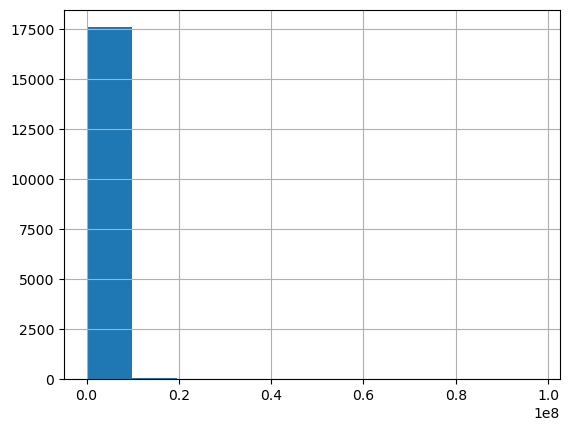

In [29]:
compras_df['IMPORTE'].hist()

<Axes: >

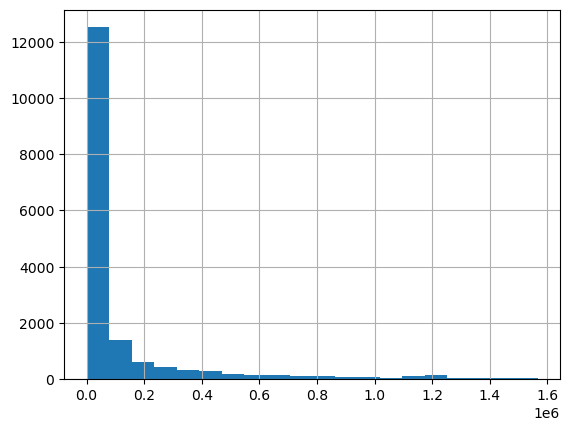

In [30]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=20)

<Axes: >

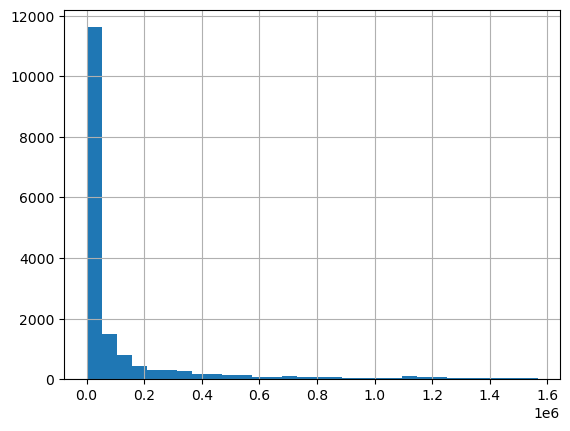

In [31]:
#Con 30 intervalos
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=30)

<Axes: >

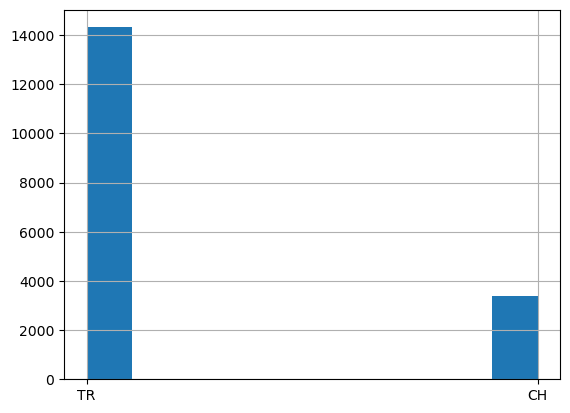

In [32]:
compras_df['TIPO'].hist()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CONTRATISTAS'),
  Text(1, 0, 'GASTOS VARIOS'),
  Text(2, 0, 'REPRESENTACION'),
  Text(3, 0, 'PERSONALES'),
  Text(4, 0, 'SERVICIOS'),
  Text(5, 0, 'COMUNICACION'),
  Text(6, 0, 'VIAJE')])

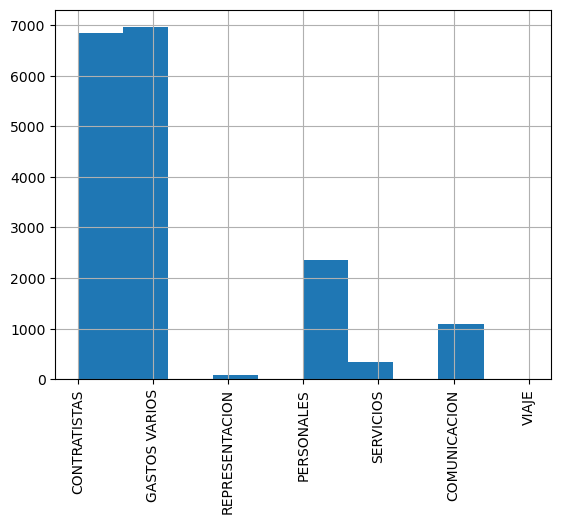

In [70]:
compras_df['SHEET'].hist()
plt.xticks(rotation=90)

# Análisis Multidimensional

In [75]:
sum_importe_beneficiario=compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [77]:
sum_importe_beneficiario.head()

BENEFICIARIO
2814 INMUEBLES S. DE R.L. DE C.V.                     24896.00
A&T IMPORTACIONES, S.A. DE C.V.                     4483538.44
ABAD MORENO MILCA SARAI                              270001.41
ABASTECEDORA DE GIMNASIOS HERCULES, S DE R.L. MI    1443386.55
ABUNDIS  ALBERTO                                     435386.86
Name: IMPORTE, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

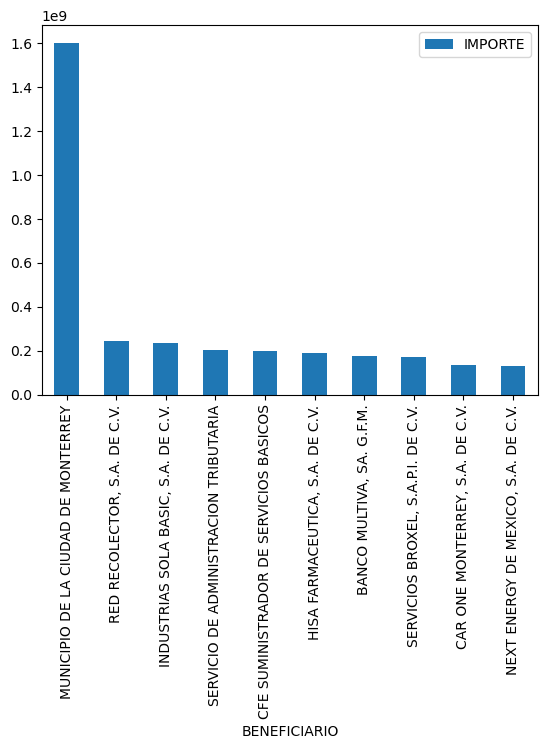

In [79]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar',x='BENEFICIARIO', y='IMPORTE')

In [80]:
mean_importe_sheet=compras_df.groupby('SHEET')['IMPORTE'].mean()

In [81]:
mean_importe_sheet.head()

SHEET
COMUNICACION      101359.724108
CONTRATISTAS      412968.725943
GASTOS VARIOS     572262.358773
PERSONALES         36627.152716
REPRESENTACION     25399.042857
Name: IMPORTE, dtype: float64

<Axes: xlabel='SHEET'>

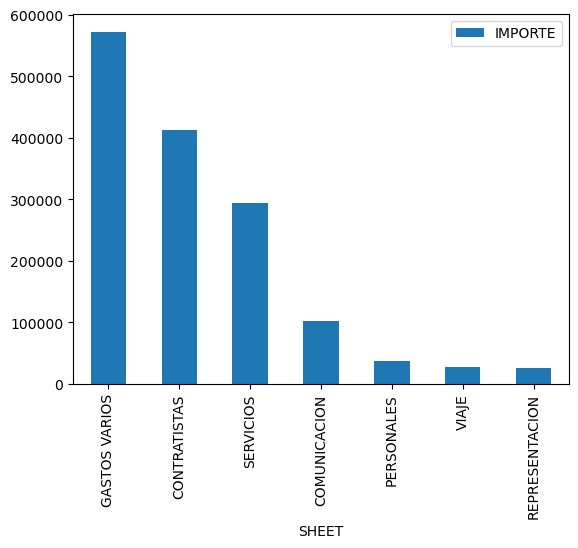

In [82]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar',x='SHEET', y='IMPORTE')

In [86]:
sum_importe_fecha=compras_df.groupby('FECHA').sum()['IMPORTE']

<Axes: xlabel='FECHA'>

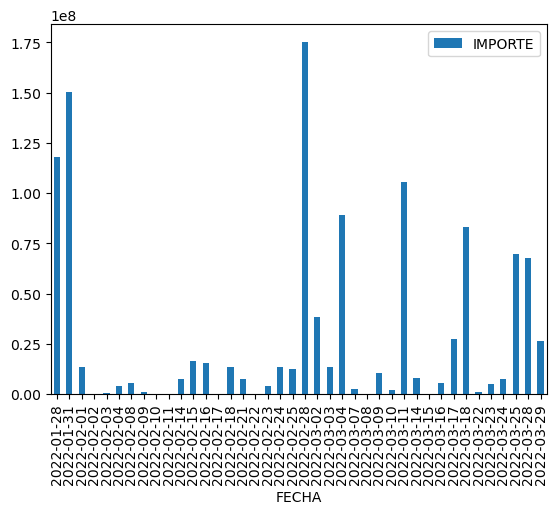

In [87]:
sum_importe_fecha.reset_index().sort_values(by='FECHA', ascending=True).iloc[0:40].plot(
    kind='bar',x='FECHA', y='IMPORTE')

In [89]:
# Análisis de cuántas facturas se emitieron por beneficiario
num_facturas_beneficiario=compras_df.groupby('BENEFICIARIO')['FACTURAS'].nunique()

In [90]:
num_facturas_beneficiario.head()

BENEFICIARIO
2814 INMUEBLES S. DE R.L. DE C.V.                    1
A&T IMPORTACIONES, S.A. DE C.V.                     18
ABAD MORENO MILCA SARAI                              1
ABASTECEDORA DE GIMNASIOS HERCULES, S DE R.L. MI     2
ABUNDIS  ALBERTO                                    10
Name: FACTURAS, dtype: int64

<Axes: xlabel='BENEFICIARIO'>

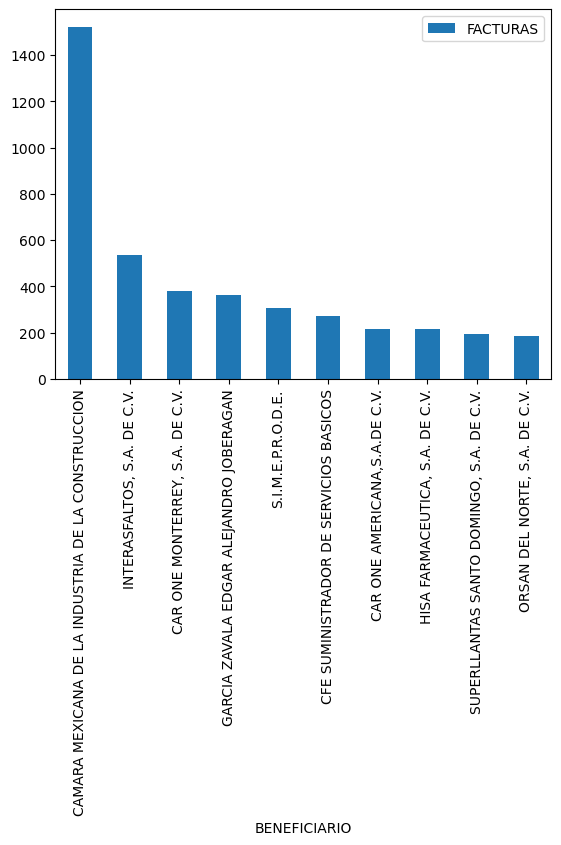

In [92]:
num_facturas_beneficiario.reset_index().sort_values(by='FACTURAS', 
                                                    ascending=False).iloc[0:10].plot(kind='bar',x='BENEFICIARIO', y='FACTURAS')

In [93]:
#Análisis de cuántos contratos se produjeron por fecha
num_contratos_fecha=compras_df.groupby('FECHA')['CONTRATO'].nunique()

In [94]:
num_contratos_fecha.head()

FECHA
2022-01-28    17
2022-01-31     1
2022-02-01     1
2022-02-02     1
2022-02-03     1
Name: CONTRATO, dtype: int64

<Axes: xlabel='FECHA'>

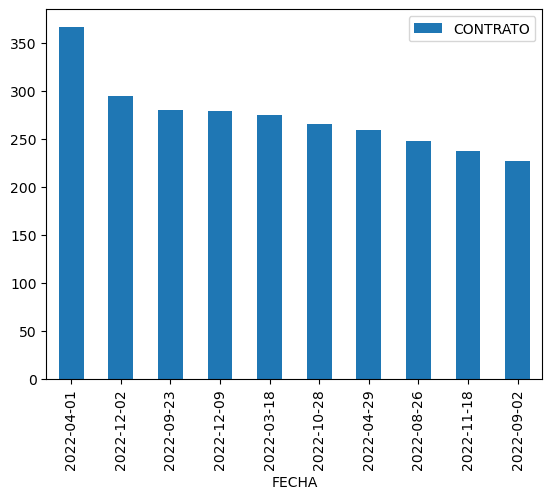

In [95]:
num_contratos_fecha.reset_index().sort_values(by='CONTRATO', 
                                                    ascending=False).iloc[0:10].plot(kind='bar',x='FECHA', y='CONTRATO')

# Análisis de texto


In [99]:
import nltk
#nltk.download() Ejecutar si no se tiene descargado nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [101]:
#Ejecutar si no está instalado wordcloud
!pip install wordcloud 

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [103]:
texto_compras=''

In [107]:
for row in compras_df['CONCEPTO']:
    texto_compras=texto_compras+' '+ row

In [108]:
stopwords_list=stopwords.words('spanish')+['2022','municipio','monterrey']

In [109]:
texto_compras=' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [112]:
wc=WordCloud(background_color='white')
wc.generate(texto_compras)

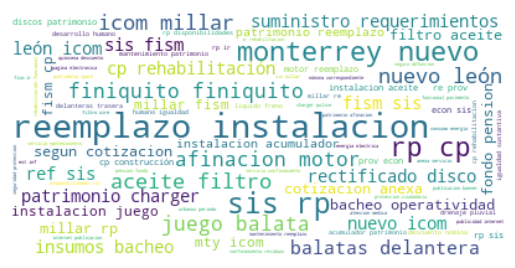

In [113]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()